# Demo: Explorando el conjunto de datos de Autos

Vamos a empezar este tutorial con una demostración para abrirte el apetito a que quieras aprender más. En esta sección vamos a revisar rapido muchos conceptos ( por ejemplo, datos, marcas, codificaciones, agregación, tipos de datos, selecciones, etc.)

Más adelante vamos a regresar a cada uno de estos temas y los vamos a tratar con más profundidad, así que no te preocupes si parece que vamos demasiado rápido!

En el tutorial en vivo, lo vamos a hacer desde cero en un *notebook* en blanco.
Pero, por la tranquilidad de quienes quieren revisar lo que hicimos en vivo, voy ( Jake ) a tratar de reproducir los ejemplos y las discusiones aquí.

## 1. Importaciones y los Datos

Empiezo importando el [paquete de Altair](http://altair-viz.github.io/) y activo el renderizador adecuado (si es que fuese necesario):

In [1]:
import altair as alt

# Los gráficos de Altair renderizan por defecto en JupyterLab y nteract

# Descomentar/ejecutar esta linea para activar Altair en un notebook clásico (no en JupyterLab)
# alt.renderers.enable('notebook')

# Descomentar/ejecutar esta linea para activar Altair en Colab
# alt.renderers.enable('colab')

Ahora vamos a usar el paquete con conjuntos de datos ( *datasets* ) [vega_datasets package](https://github.com/altair-viz/vega_datasets), para cargar un *dataset* de ejemplo:

In [2]:
from vega_datasets import data

cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

Notar que los datos están en formato de columnas: es decir, cada columna contiene un **atributo** de un punto de datos, y cada fila contiene una sola instancia de los datos.

## 2. Gráficos Cero, Uno, y Dos-dimensional

Usando Altair, podemos empezar a explorar los datos.

El gráfico más sencillo tiene todos los datos, junto con una marca/símbolo que representa cada fila: 

In [3]:
alt.Chart(cars).mark_point()

Éste es un gráfico bastante bobo, porque consiste de 150 puntos, todos amontonados uno arriba de otro. Pero, técnicamente *es* una representación de los datos!

Para hacerlo más interesante, necesitamos *codificar* las distintas columnas en características visuales de un gráfico ( ej. posición en el eje __x__, posición en el eje **y**, el tamaño, el color, etc.)

Codifiquemos las millas por galón ( *miles per galon* ) en el eje **x** usando el método ``encode()``:

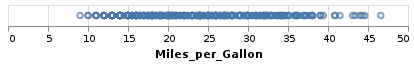

In [4]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon'
)

Ésto está un poco mejor, pero la marca de ``point`` probablemente no es lo mejor para un gráfico 1D como éste.

Usemos la marca ``tick`` en su lugar:

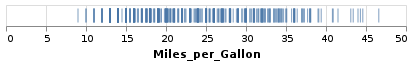

In [5]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon'
)

Otra cosa que podemos hacer con los puntos es expandirlos a un gráfico 2D, codificando también el valor en __y__. Volvamos a usar los marcadores ``point``, y pongamos ``Horsepower`` (caballos de fuerza) en el eje **y**.

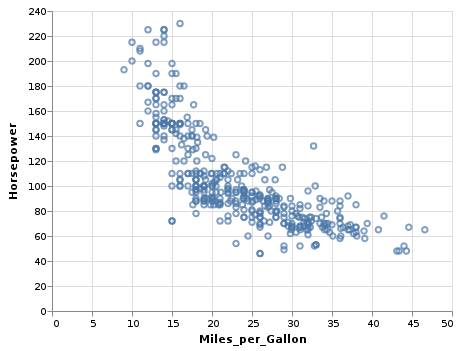

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
)

## 3. Interacciones sencillas

Una de las mejores características de Altair es la gramática de interacciones que brinda.
El tipo de interacción más sencilla es la habilidad de enfocar y ampliar regiones en un gráfico; Altair tiene un atajo para activarla a través del método ``interactive()``:

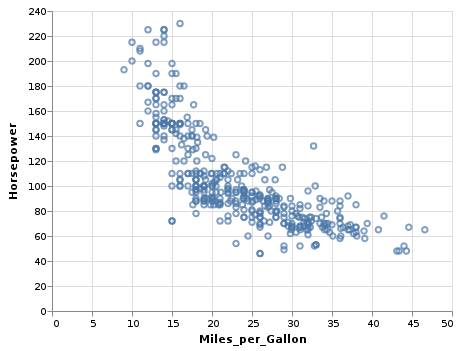

In [7]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
).interactive()

Ésto les permite hacer *click* y arrastrar, así también a usar el _scroll_ para ampliar y reducir regiones en el gráfico.

Más adelante vamos a ver otras interacciones.

## 4. Una tercera dimensión: el Color

Un gráfico 2D nos permite codificar dos dimensiones de los datos. Veamos cómo podemos usar el color para codificar una tercera dimensión:

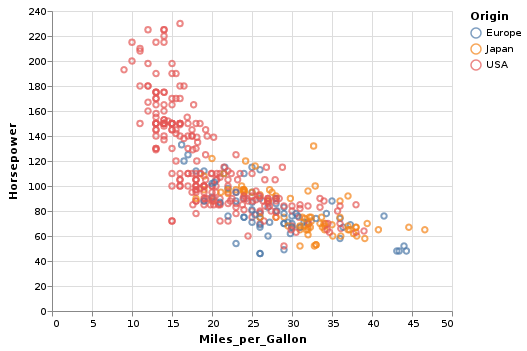

In [8]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Noten que al usar un valor categórico para el color, elige el mapa de colores apropiado para datos categóricos.

Veamos qué pasa si usamos valores continuos para el color:

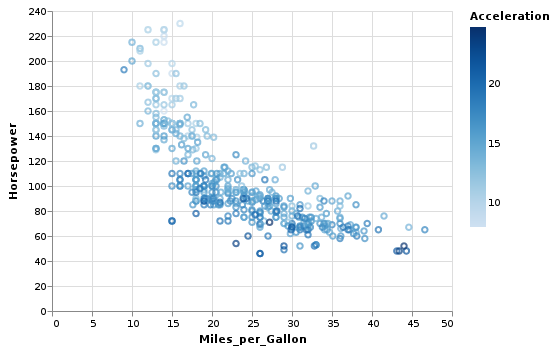

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Acceleration'
)

Un color continuo resulta en una escala de colores apropiada para datos continuos.

¿Qué pasa en los casos intermedios como: categorías ordenadas, como el número de cilindros?

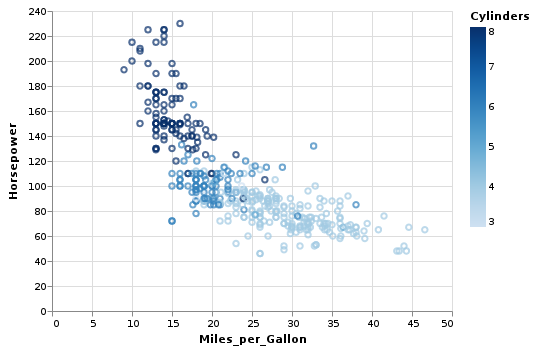

In [10]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders'
)

Altair todavía elige una variable continua porque el número de cilindros es numérica.

Podemos mejorar este hecho especificando que los datos tienen que ser considerados como un valor discreto y ordenado; esto lo podemos hacer agregando ``":O"`` ( "O" de "ordinal" o "categoría ordenada" ) después de la codificación:

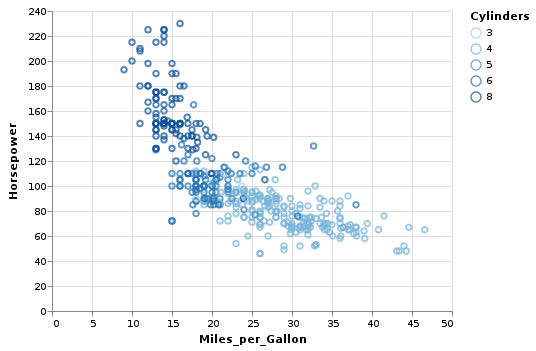

In [11]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:O'
)

Ahora tenemos una leyenda discreta con un mapa de colores ordenado.

## 5. Bineado y agregación

Regresemos rápidamente a nuestro gráfico 1D de millas por galón:

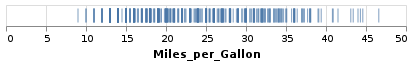

In [12]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
)

Otra forma en la que podemos representar estos datos es con un histograma: agrupar los datos en bloques en el eje **x** y mostrar en el eje __y__ la cantidad de datos que cae en cada bloque.  

En muchas librerías gráficas ésto se hace con un método especial como ``hist()``. En Altair, el bineado y la agregación son parte de la API declarativa.

Para ir más allá del nombre de un atributo, usamos ``alt.X()`` para codificar en el eje **x**, y usamos ``'count()'`` para codificar en el eje __y__:

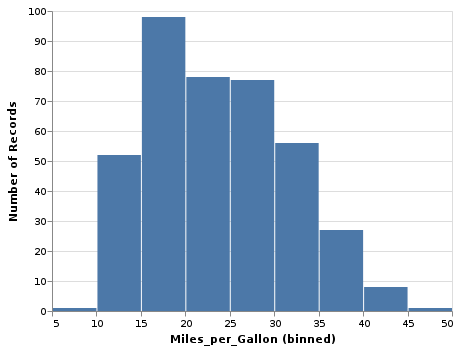

In [13]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y='count()'
)

Si quisiéramos más control sobre los bines, podemos usar ``alt.Bin`` para ajustar sus parámetros.

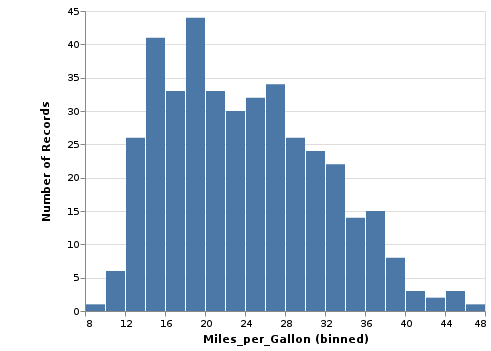

In [14]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()'
)

Si aplicamos otra codificación ( como ``color`` ), los datos se agrupan automáticamente en cada bin:

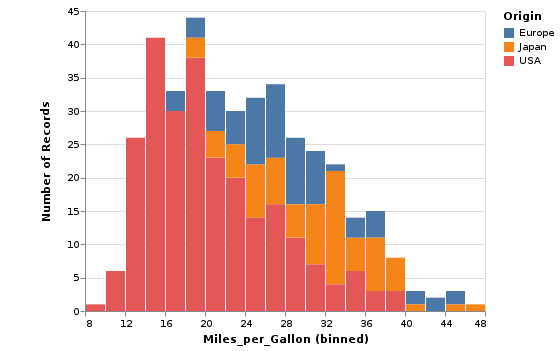

In [15]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
)

Si prefieren un gráfico separado para cada categoría, la codificación ``column`` puede serles de ayuda:

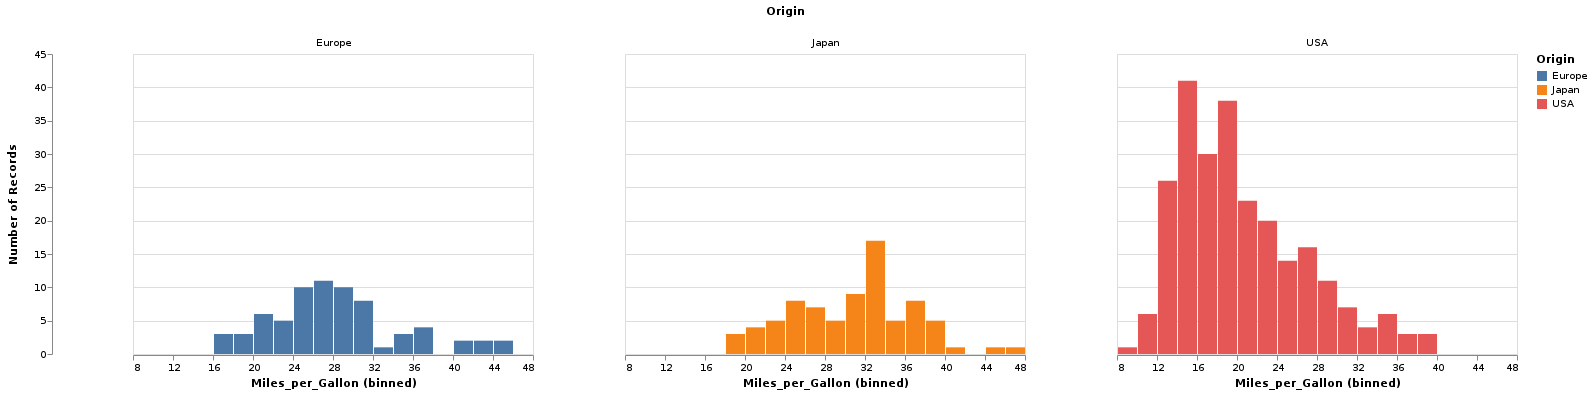

In [16]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin',
    column='Origin'
)

El bineado y la agregación también funciona en dos dimensiones; podemos usar el marcador ``rect`` y visualizar el conteo usando el color:

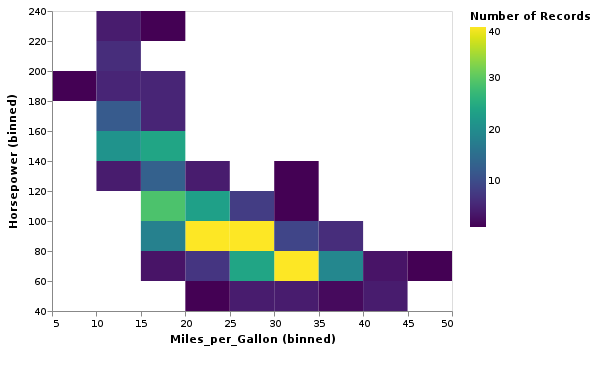

In [17]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='count()'
)

Las agregaciones pueden ser mucho más que un simple conteo; también podemos agregar y calcular el promedio de una tercera cantidad dentro de cada bin

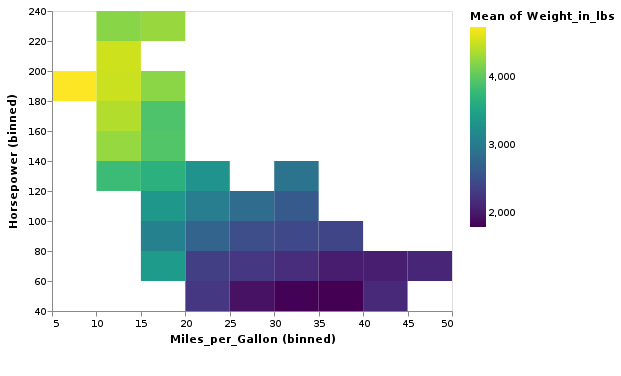

In [18]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='mean(Weight_in_lbs)'
)

## 6. Series temporales y estratificación 

Hasta ahora estuvimos ignorando la columna ``date`` ( fecha ), pero es interesante ver las tendencias a lo largo del tiempo, por ejemplo, las millas por galón:

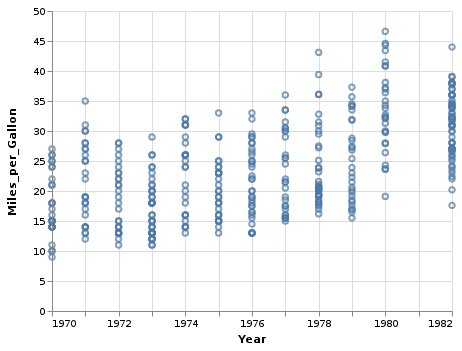

In [19]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Miles_per_Gallon'
)

Cada año tiene un número de autos, y los datos están muy superpuestos.
Podemos limpiar un poco ésto graficando el promedio para cada valor en x:

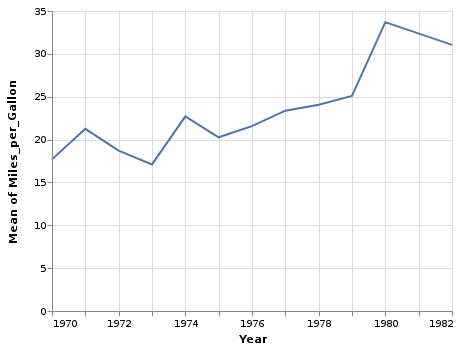

In [20]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
)

Alternativamente, podemos cambiar el tipo de marca a ``area`` y usar las marcas ``ci0`` y ``ci1`` para graficar el intervalo de confianza alrededor del promedio:

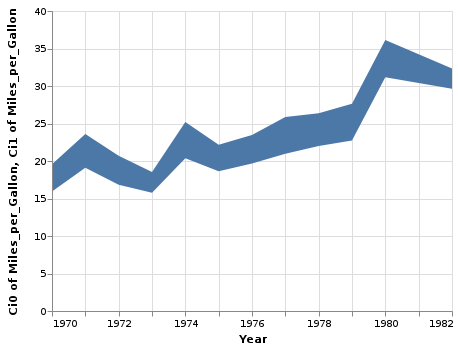

In [21]:
alt.Chart(cars).mark_area().encode(
    x='Year',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

Ajustemos un poco el gráfico: agreguemos opacidad, coloreemos a partir del pais de origen, ensanchemos la figura, y agreguemos un título más prolijo al eje y:

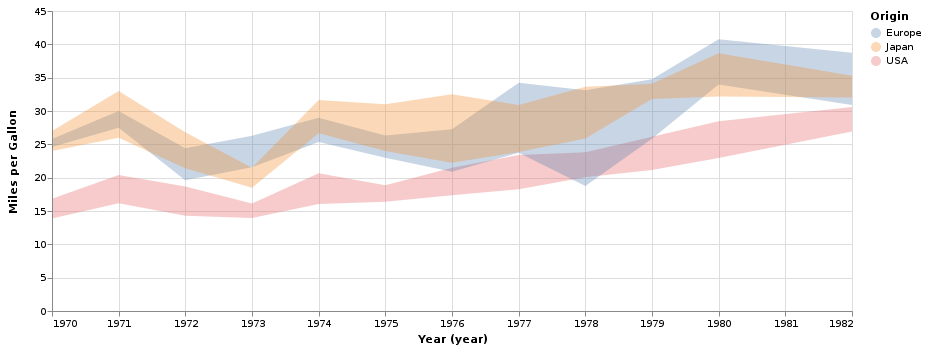

In [22]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

Por último, podemos usar la API de superposición por capas de Altair para superponer un gráfico de línea representando el promedio, sobre el gráfico de área representando el intervalo de confianza:

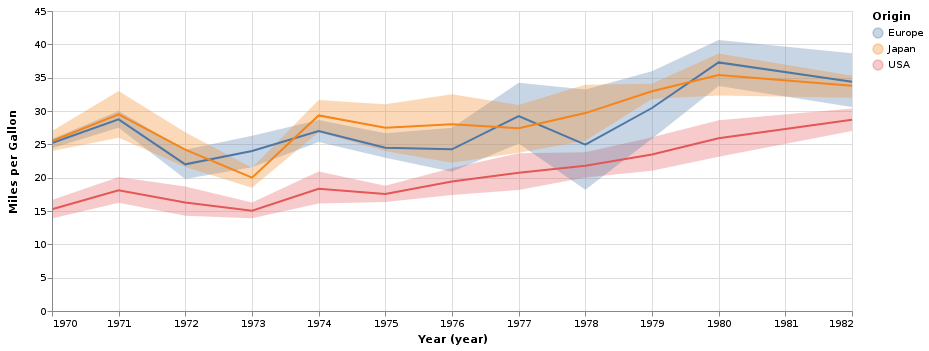

In [23]:
spread = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

lines = alt.Chart(cars).mark_line().encode(
    x=alt.X('Year', timeUnit='year'),
    y='mean(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

spread + lines

## 7. Interactividad: Selecciones

Regresemos al gráfico de dispersión, y veamos otros tipos de interactividad que ofrece Altair:

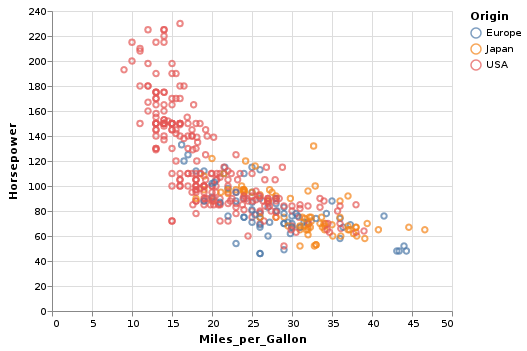

In [24]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Recuerden que podemos agregar ``interactive()`` al final de cada gráfico para activar las escalas interactivas más básicas:

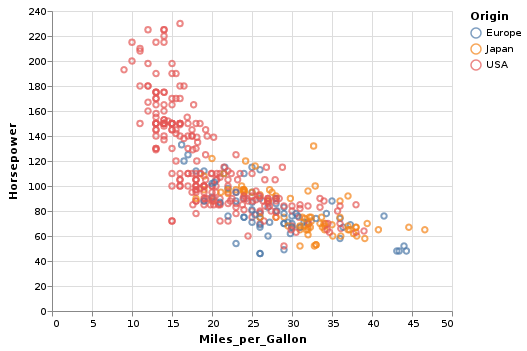

In [25]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).interactive()

Altair brinda una API de general de ``selection`` para crear gráficos interactivos; por ejemplo, podemos seleccionar un intervalo:

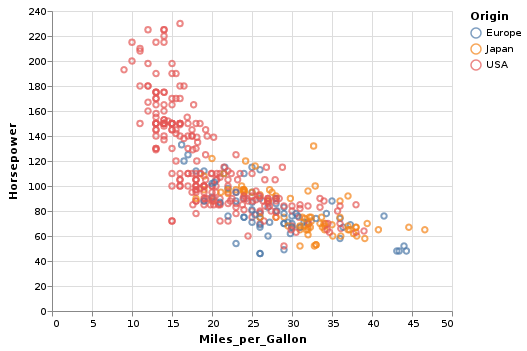

In [26]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(
    selection=interval
)

Actualmente esta selección no hace nada, pero podemos cambiar el color condicionalmente con la selección:

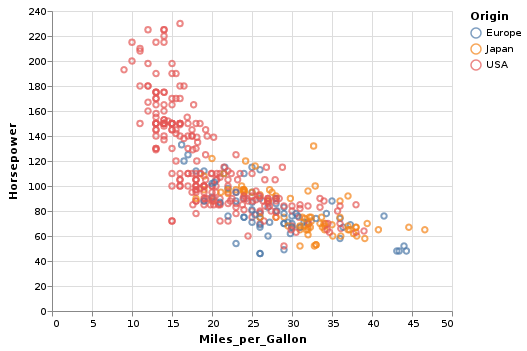

In [27]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

Algo muy bueno de esta API de selección es que se aplica *automáticamente* a todo el gráfico compuesto; por ejemplo, podemos concatenar horizontalmente dos gráficos, y como ambos tienen la misma selección, ambos responden apropiadamente:

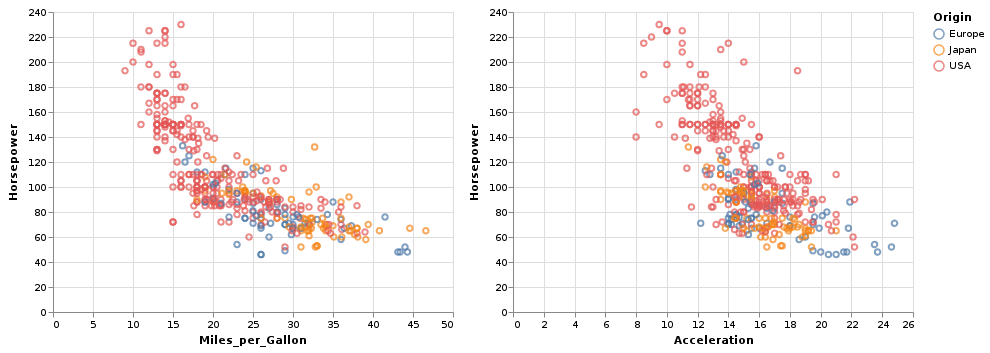

In [28]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

Aún podemos hacer cosas más sofisticadas usando selecciones.
Por ejemplo, hagamos un histograma con el número de autos por lugar de origen, y apilémolo al gráfico de dispersión:

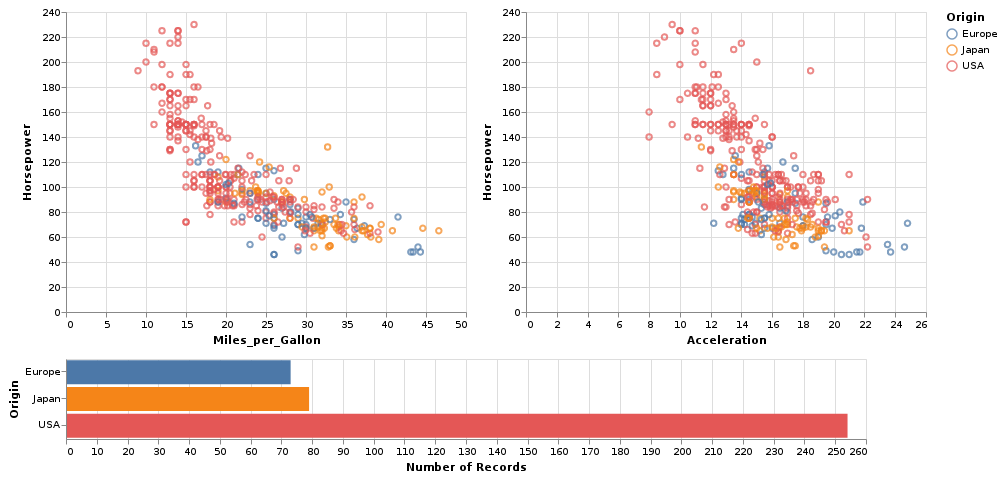

In [29]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

scatter = base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

scatter & hist

Esta demostración cubrió un buen número de componentes disponibles en Altair.
En las secciones siguientes, vamos a ver cada una de manera un poco más sistemática.